In [575]:
!pip install tensorflow

In [576]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from datetime import datetime
import random as rnd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42


In [442]:
cdatas = pd.read_csv("Bitcoin Historical Data - Investing.com.csv", sep=',', header=0)

In [443]:
cdatas.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 26, 2022","37,625.9","36,962.3","37,919.6","36,578.5",81.51K,1.83%
1,"Jan 25, 2022","36,950.6","36,691.3","37,501.8","35,729.3",79.68K,0.72%
2,"Jan 24, 2022","36,686.3","36,268.6","37,424.0","32,985.6",153.77K,1.15%
3,"Jan 23, 2022","36,269.5","35,072.9","36,513.0","34,655.2",70.43K,3.40%
4,"Jan 22, 2022","35,075.2","36,467.7","36,749.8","34,116.0",138.09K,-3.84%


In [444]:
list(cdatas)

['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

In [445]:
cdatas = cdatas.drop(["Price", "Open","High","Low","Vol."], axis=1 )

In [446]:
cdatas.head()

,Date,Change %
0,"Jan 26, 2022",1.83%
1,"Jan 25, 2022",0.72%
2,"Jan 24, 2022",1.15%
3,"Jan 23, 2022",3.40%
4,"Jan 22, 2022",-3.84%


In [447]:
cdatas = cdatas.rename({'Change %': 'Bitcoin'}, axis=1)  # new method

In [448]:
cdatas.head()

,Date,Bitcoin
0,"Jan 26, 2022",1.83%
1,"Jan 25, 2022",0.72%
2,"Jan 24, 2022",1.15%
3,"Jan 23, 2022",3.40%
4,"Jan 22, 2022",-3.84%


In [449]:
cdatas.sort_values('Date', axis=0, ascending=False,)

,Date,Bitcoin
118,"Sep 30, 2021",5.50%
119,"Sep 29, 2021",1.25%
120,"Sep 28, 2021",-2.73%
121,"Sep 27, 2021",-2.39%
122,"Sep 26, 2021",1.21%
...,...,...
296,"Apr 05, 2021",1.36%
297,"Apr 04, 2021",2.00%
298,"Apr 03, 2021",-3.25%
299,"Apr 02, 2021",0.44%


In [450]:
len(cdatas.index)

366

In [451]:
file_list=['Polkadot Historical Data - Investing.com.csv',
'Polygon Historical Data - Investing.com.csv',
'Shiba Inu - SHIBA INU Historical Data - Investing.com.csv',
'Solana Historical Data - Investing.com.csv',
'Stellar Historical Data - Investing.com.csv',
'Terra Historical Data - Investing.com.csv',
'TerraUSD Historical Data - Investing.com.csv',
'Tether Historical Data - Investing.com.csv',
'TRON Historical Data - Investing.com.csv',
'Uniswap Historical Data - Investing.com.csv',
'USD Coin Historical Data - Investing.com.csv',
'Wrapped Bitcoin Historical Data - Investing.com.csv',
'XRP Historical Data - Investing.com.csv',
'Algorand Historical Data - Investing.com.csv',
'Avalanche Historical Data - Investing.com.csv',
'Binance USD Historical Data - Investing.com.csv',
'Bitcoin Cash Historical Data - Investing.com.csv',
'Bitcoin Historical Data - Investing.com.csv',
'BNB Historical Data - Investing.com.csv',
'Cardano Historical Data - Investing.com.csv',
'Chainlink Historical Data - Investing.com.csv',
'Cosmos Historical Data - Investing.com.csv',
'Crypto.com Coin Historical Data - Investing.com.csv',
'Dai Historical Data - Investing.com.csv',
'Dogecoin Historical Data - Investing.com.csv',
'Ethereum Historical Data - Investing.com.csv',
'Fantom Historical Data - Investing.com.csv',
'FTX Token Historical Data - Investing.com.csv',
'Litecoin Historical Data - Investing.com.csv',
'NEAR Protocol Historical Data - Investing.com.csv']
  
main_dataframe = pd.DataFrame(pd.read_csv(file_list[0]))
  
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data)
    main_dataframe = pd.merge(main_dataframe,df,how = "outer",on='Date')
print(main_dataframe)

C:\Users\Mate\AppData\Local\Temp/ipykernel_44868/3411641278.py:37: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Vol._x', 'Change %_x', 'Price_x', 'Open_x', 'Low_x', 'High_x'} in the result is deprecated and will raise a MergeError in a future version.
  main_dataframe = pd.merge(main_dataframe,df,how = "outer",on='Date')


             Date  Price_x  Open_x  High_x   Low_x  Vol._x  Change %_x  \
0    Jan 26, 2022   18.721  18.292  19.000  18.170   9.79M       2.34%   
1    Jan 25, 2022   18.292  18.040  19.031  17.390  20.58M       1.40%   
2    Jan 24, 2022   18.040  18.821  18.821  15.870  42.12M      -4.15%   
3    Jan 23, 2022   18.821  18.279  19.180  17.740  23.69M       2.97%   
4    Jan 22, 2022   18.279  19.709  20.090  16.289  48.78M      -7.26%   
..            ...      ...     ...     ...     ...     ...         ...   
361  Jan 30, 2021      NaN     NaN     NaN     NaN     NaN         NaN   
362  Jan 29, 2021      NaN     NaN     NaN     NaN     NaN         NaN   
363  Jan 28, 2021      NaN     NaN     NaN     NaN     NaN         NaN   
364  Jan 27, 2021      NaN     NaN     NaN     NaN     NaN         NaN   
365  Jan 26, 2021      NaN     NaN     NaN     NaN     NaN         NaN   

     Price_y  Open_y  High_y  ...   High_x    Low_x   Vol._x  Change %_x  \
0      1.591   1.558   1.617  ...  

In [452]:
##crypto = main_dataframe.loc[:, df.columns.intersection(['Date','Change %'])]


In [453]:
alldate=main_dataframe.filter( like='Date', axis=1)

In [454]:
alldata=main_dataframe.filter( like='Change %', axis=1)

In [455]:
alldate.head()

,Date
0,"Jan 26, 2022"
1,"Jan 25, 2022"
2,"Jan 24, 2022"
3,"Jan 23, 2022"
4,"Jan 22, 2022"


In [456]:
Cryptoclear = pd.concat([alldate, alldata], axis=1)

In [457]:
Cryptoclear.head(367)

,Date,Change %_x,Change %_y,Change %_x,Change %_y,Change %_x,Change %_y,Change %_x,Change %_y,Change %_x,...,Change %_x,Change %_y,Change %_x,Change %_y,Change %_x,Change %_y,Change %_x,Change %_y,Change %_x,Change %_y
0,"Jan 26, 2022",2.34%,2.13%,2.05%,0.95%,1.27%,0.41%,-0.10%,-0.02%,1.50%,...,2.52%,-3.09%,3.47%,-0.09%,1.35%,1.14%,-0.35%,1.65%,0.74%,-3.02%
1,"Jan 25, 2022",1.40%,3.32%,-0.94%,3.18%,-0.67%,-4.90%,0.00%,0.02%,1.48%,...,-0.44%,-0.31%,4.62%,0.07%,3.86%,0.70%,5.73%,2.40%,-1.46%,13.11%
2,"Jan 24, 2022",-4.15%,-6.64%,-5.52%,-8.00%,-1.56%,-5.19%,0.00%,-0.01%,-4.28%,...,-6.43%,4.10%,-1.02%,-0.03%,-3.10%,-3.93%,-1.14%,-1.03%,-2.49%,-8.42%
3,"Jan 23, 2022",2.97%,5.14%,9.35%,5.39%,4.53%,10.78%,0.00%,0.02%,1.27%,...,4.85%,17.97%,12.12%,-0.15%,6.36%,5.32%,15.78%,7.71%,3.69%,2.61%
4,"Jan 22, 2022",-7.26%,-9.86%,-7.85%,-15.75%,-5.26%,-3.14%,-0.20%,0.00%,-7.04%,...,-8.91%,-15.32%,-7.23%,0.04%,-6.24%,-6.17%,-13.84%,-13.37%,-5.58%,-13.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Jan 30, 2021",NaN,0.00%,NaN,10.15%,11.97%,NaN,NaN,0.08%,-3.54%,...,3.91%,NaN,-3.75%,-0.28%,-39.49%,-0.17%,NaN,NaN,-0.98%,NaN
362,"Jan 29, 2021",NaN,4.02%,NaN,0.60%,0.25%,NaN,NaN,-0.07%,12.82%,...,-1.09%,NaN,-2.15%,0.06%,28.49%,3.83%,NaN,NaN,1.09%,NaN
363,"Jan 28, 2021",NaN,-7.84%,NaN,3.54%,22.79%,NaN,NaN,-0.06%,4.54%,...,9.58%,NaN,7.70%,-0.22%,387.36%,6.48%,NaN,NaN,8.80%,NaN
364,"Jan 27, 2021",NaN,-3.02%,NaN,-8.64%,-8.99%,NaN,NaN,0.07%,-4.11%,...,-9.23%,NaN,-7.85%,-0.06%,-9.70%,-8.68%,NaN,NaN,-9.11%,NaN


In [458]:
Cryptoclear.columns=['Date','Polkadot',
'Polygon',
'Shiba',
'Solana',
'Stellar',
'Terra',
'TerraUSD',
'Tether',
'TRON',
'Uniswap',
'USD',
'Wrapped',
'XRP',
'Algorand',
'Avalanche',
'Binance',
'Bitcoincash',
'Bitcoin',
'BNB',
'Cardano',
'Chainlink',
'Cosmos',
'Crypto.com',
'Dai',
'Dogecoin',
'Ethereum',
'Fantom',
'FTX',
'Litecoin',
'NEAR',
]

In [459]:
Cryptoclear.head()

,Date,Polkadot,Polygon,Shiba,Solana,Stellar,Terra,TerraUSD,Tether,TRON,...,Chainlink,Cosmos,Crypto.com,Dai,Dogecoin,Ethereum,Fantom,FTX,Litecoin,NEAR
0,"Jan 26, 2022",2.34%,2.13%,2.05%,0.95%,1.27%,0.41%,-0.10%,-0.02%,1.50%,...,2.52%,-3.09%,3.47%,-0.09%,1.35%,1.14%,-0.35%,1.65%,0.74%,-3.02%
1,"Jan 25, 2022",1.40%,3.32%,-0.94%,3.18%,-0.67%,-4.90%,0.00%,0.02%,1.48%,...,-0.44%,-0.31%,4.62%,0.07%,3.86%,0.70%,5.73%,2.40%,-1.46%,13.11%
2,"Jan 24, 2022",-4.15%,-6.64%,-5.52%,-8.00%,-1.56%,-5.19%,0.00%,-0.01%,-4.28%,...,-6.43%,4.10%,-1.02%,-0.03%,-3.10%,-3.93%,-1.14%,-1.03%,-2.49%,-8.42%
3,"Jan 23, 2022",2.97%,5.14%,9.35%,5.39%,4.53%,10.78%,0.00%,0.02%,1.27%,...,4.85%,17.97%,12.12%,-0.15%,6.36%,5.32%,15.78%,7.71%,3.69%,2.61%
4,"Jan 22, 2022",-7.26%,-9.86%,-7.85%,-15.75%,-5.26%,-3.14%,-0.20%,0.00%,-7.04%,...,-8.91%,-15.32%,-7.23%,0.04%,-6.24%,-6.17%,-13.84%,-13.37%,-5.58%,-13.80%


In [460]:
df2=Cryptoclear.dropna(axis=1)


In [461]:
df2.head(30000)

,Date,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
0,"Jan 26, 2022",2.13%,1.27%,-0.02%,1.50%,0.03%,0.58%,-0.06%,1.68%,1.83%,-0.39%,0.63%,2.52%,3.47%,-0.09%,1.35%,1.14%,0.74%
1,"Jan 25, 2022",3.32%,-0.67%,0.02%,1.48%,-0.03%,0.90%,7.92%,-0.24%,0.72%,3.58%,-2.25%,-0.44%,4.62%,0.07%,3.86%,0.70%,-1.46%
2,"Jan 24, 2022",-6.64%,-1.56%,-0.01%,-4.28%,-0.03%,-2.65%,-2.78%,-3.40%,1.15%,-3.26%,-5.18%,-6.43%,-1.02%,-0.03%,-3.10%,-3.93%,-2.49%
3,"Jan 23, 2022",5.14%,4.53%,0.02%,1.27%,-0.01%,5.36%,8.23%,3.67%,3.40%,7.14%,4.98%,4.85%,12.12%,-0.15%,6.36%,5.32%,3.69%
4,"Jan 22, 2022",-9.86%,-5.26%,0.00%,-7.04%,0.01%,-6.37%,-9.56%,-7.30%,-3.84%,-6.71%,-4.41%,-8.91%,-7.23%,0.04%,-6.24%,-6.17%,-5.58%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Jan 30, 2021",0.00%,11.97%,0.08%,-3.54%,-0.07%,56.67%,3.39%,2.38%,-0.05%,4.40%,4.61%,3.91%,-3.75%,-0.28%,-39.49%,-0.17%,-0.98%
362,"Jan 29, 2021",4.02%,0.25%,-0.07%,12.82%,0.19%,7.05%,-2.71%,0.67%,2.78%,0.93%,1.12%,-1.09%,-2.15%,0.06%,28.49%,3.83%,1.09%
363,"Jan 28, 2021",-7.84%,22.79%,-0.06%,4.54%,-0.07%,5.35%,6.92%,7.06%,9.77%,3.63%,10.19%,9.58%,7.70%,-0.22%,387.36%,6.48%,8.80%
364,"Jan 27, 2021",-3.02%,-8.99%,0.07%,-4.11%,-0.08%,-6.59%,-8.56%,-11.68%,-6.46%,-1.80%,-9.19%,-9.23%,-7.85%,-0.06%,-9.70%,-8.68%,-9.11%


In [462]:
df2 = df2.drop(["Date" ], axis=1 )

In [463]:
df2.head(30000)

,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
0,2.13%,1.27%,-0.02%,1.50%,0.03%,0.58%,-0.06%,1.68%,1.83%,-0.39%,0.63%,2.52%,3.47%,-0.09%,1.35%,1.14%,0.74%
1,3.32%,-0.67%,0.02%,1.48%,-0.03%,0.90%,7.92%,-0.24%,0.72%,3.58%,-2.25%,-0.44%,4.62%,0.07%,3.86%,0.70%,-1.46%
2,-6.64%,-1.56%,-0.01%,-4.28%,-0.03%,-2.65%,-2.78%,-3.40%,1.15%,-3.26%,-5.18%,-6.43%,-1.02%,-0.03%,-3.10%,-3.93%,-2.49%
3,5.14%,4.53%,0.02%,1.27%,-0.01%,5.36%,8.23%,3.67%,3.40%,7.14%,4.98%,4.85%,12.12%,-0.15%,6.36%,5.32%,3.69%
4,-9.86%,-5.26%,0.00%,-7.04%,0.01%,-6.37%,-9.56%,-7.30%,-3.84%,-6.71%,-4.41%,-8.91%,-7.23%,0.04%,-6.24%,-6.17%,-5.58%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.00%,11.97%,0.08%,-3.54%,-0.07%,56.67%,3.39%,2.38%,-0.05%,4.40%,4.61%,3.91%,-3.75%,-0.28%,-39.49%,-0.17%,-0.98%
362,4.02%,0.25%,-0.07%,12.82%,0.19%,7.05%,-2.71%,0.67%,2.78%,0.93%,1.12%,-1.09%,-2.15%,0.06%,28.49%,3.83%,1.09%
363,-7.84%,22.79%,-0.06%,4.54%,-0.07%,5.35%,6.92%,7.06%,9.77%,3.63%,10.19%,9.58%,7.70%,-0.22%,387.36%,6.48%,8.80%
364,-3.02%,-8.99%,0.07%,-4.11%,-0.08%,-6.59%,-8.56%,-11.68%,-6.46%,-1.80%,-9.19%,-9.23%,-7.85%,-0.06%,-9.70%,-8.68%,-9.11%


In [464]:
df2=df2.dropna(axis=1)

In [465]:
df2.isnull().values.any()

False

In [466]:

df2.dtypes

Polygon        object
Stellar        object
Tether         object
TRON           object
USD            object
XRP            object
Avalanche      object
Bitcoincash    object
Bitcoin        object
BNB            object
Cardano        object
Chainlink      object
Crypto.com     object
Dai            object
Dogecoin       object
Ethereum       object
Litecoin       object
dtype: object

In [467]:
list(df2)

['Polygon',
 'Stellar',
 'Tether',
 'TRON',
 'USD',
 'XRP',
 'Avalanche',
 'Bitcoincash',
 'Bitcoin',
 'BNB',
 'Cardano',
 'Chainlink',
 'Crypto.com',
 'Dai',
 'Dogecoin',
 'Ethereum',
 'Litecoin']

In [468]:
list(df2)

['Polygon',
 'Stellar',
 'Tether',
 'TRON',
 'USD',
 'XRP',
 'Avalanche',
 'Bitcoincash',
 'Bitcoin',
 'BNB',
 'Cardano',
 'Chainlink',
 'Crypto.com',
 'Dai',
 'Dogecoin',
 'Ethereum',
 'Litecoin']

In [469]:
df2.dtypes

Polygon        object
Stellar        object
Tether         object
TRON           object
USD            object
XRP            object
Avalanche      object
Bitcoincash    object
Bitcoin        object
BNB            object
Cardano        object
Chainlink      object
Crypto.com     object
Dai            object
Dogecoin       object
Ethereum       object
Litecoin       object
dtype: object

In [470]:
df2.head(30000)

,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
0,2.13%,1.27%,-0.02%,1.50%,0.03%,0.58%,-0.06%,1.68%,1.83%,-0.39%,0.63%,2.52%,3.47%,-0.09%,1.35%,1.14%,0.74%
1,3.32%,-0.67%,0.02%,1.48%,-0.03%,0.90%,7.92%,-0.24%,0.72%,3.58%,-2.25%,-0.44%,4.62%,0.07%,3.86%,0.70%,-1.46%
2,-6.64%,-1.56%,-0.01%,-4.28%,-0.03%,-2.65%,-2.78%,-3.40%,1.15%,-3.26%,-5.18%,-6.43%,-1.02%,-0.03%,-3.10%,-3.93%,-2.49%
3,5.14%,4.53%,0.02%,1.27%,-0.01%,5.36%,8.23%,3.67%,3.40%,7.14%,4.98%,4.85%,12.12%,-0.15%,6.36%,5.32%,3.69%
4,-9.86%,-5.26%,0.00%,-7.04%,0.01%,-6.37%,-9.56%,-7.30%,-3.84%,-6.71%,-4.41%,-8.91%,-7.23%,0.04%,-6.24%,-6.17%,-5.58%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.00%,11.97%,0.08%,-3.54%,-0.07%,56.67%,3.39%,2.38%,-0.05%,4.40%,4.61%,3.91%,-3.75%,-0.28%,-39.49%,-0.17%,-0.98%
362,4.02%,0.25%,-0.07%,12.82%,0.19%,7.05%,-2.71%,0.67%,2.78%,0.93%,1.12%,-1.09%,-2.15%,0.06%,28.49%,3.83%,1.09%
363,-7.84%,22.79%,-0.06%,4.54%,-0.07%,5.35%,6.92%,7.06%,9.77%,3.63%,10.19%,9.58%,7.70%,-0.22%,387.36%,6.48%,8.80%
364,-3.02%,-8.99%,0.07%,-4.11%,-0.08%,-6.59%,-8.56%,-11.68%,-6.46%,-1.80%,-9.19%,-9.23%,-7.85%,-0.06%,-9.70%,-8.68%,-9.11%


In [471]:
list(df2)

['Polygon',
 'Stellar',
 'Tether',
 'TRON',
 'USD',
 'XRP',
 'Avalanche',
 'Bitcoincash',
 'Bitcoin',
 'BNB',
 'Cardano',
 'Chainlink',
 'Crypto.com',
 'Dai',
 'Dogecoin',
 'Ethereum',
 'Litecoin']

In [472]:
df2['Polygon'] = df2['Polygon'].replace({'%':''}, regex=True)
df2['Stellar'] = df2['Stellar'].replace({'%':''}, regex=True)
df2['Tether'] = df2['Tether'].replace({'%':''}, regex=True)
df2['TRON'] = df2['TRON'].replace({'%':''}, regex=True)
df2['USD'] = df2['USD'].replace({'%':''}, regex=True)
df2['XRP'] = df2['XRP'].replace({'%':''}, regex=True)
df2['Avalanche'] = df2['Avalanche'].replace({'%':''}, regex=True)
df2['Bitcoincash'] = df2['Bitcoincash'].replace({'%':''}, regex=True)
df2['Bitcoin'] = df2['Bitcoin'].replace({'%':''}, regex=True)
df2['BNB'] = df2['BNB'].replace({'%':''}, regex=True)
df2['Cardano'] = df2['Cardano'].replace({'%':''}, regex=True)
df2['Chainlink'] = df2['Chainlink'].replace({'%':''}, regex=True)
df2['Crypto.com'] = df2['Crypto.com'].replace({'%':''}, regex=True)
df2['Dai'] = df2['Dai'].replace({'%':''}, regex=True)
df2['Dogecoin'] = df2['Dogecoin'].replace({'%':''}, regex=True)
df2['Ethereum'] = df2['Ethereum'].replace({'%':''}, regex=True)
df2['Litecoin'] = df2['Litecoin'].replace({'%':''}, regex=True)

In [473]:
df2.head(30000)

,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
0,2.13,1.27,-0.02,1.50,0.03,0.58,-0.06,1.68,1.83,-0.39,0.63,2.52,3.47,-0.09,1.35,1.14,0.74
1,3.32,-0.67,0.02,1.48,-0.03,0.90,7.92,-0.24,0.72,3.58,-2.25,-0.44,4.62,0.07,3.86,0.70,-1.46
2,-6.64,-1.56,-0.01,-4.28,-0.03,-2.65,-2.78,-3.40,1.15,-3.26,-5.18,-6.43,-1.02,-0.03,-3.10,-3.93,-2.49
3,5.14,4.53,0.02,1.27,-0.01,5.36,8.23,3.67,3.40,7.14,4.98,4.85,12.12,-0.15,6.36,5.32,3.69
4,-9.86,-5.26,0.00,-7.04,0.01,-6.37,-9.56,-7.30,-3.84,-6.71,-4.41,-8.91,-7.23,0.04,-6.24,-6.17,-5.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.00,11.97,0.08,-3.54,-0.07,56.67,3.39,2.38,-0.05,4.40,4.61,3.91,-3.75,-0.28,-39.49,-0.17,-0.98
362,4.02,0.25,-0.07,12.82,0.19,7.05,-2.71,0.67,2.78,0.93,1.12,-1.09,-2.15,0.06,28.49,3.83,1.09
363,-7.84,22.79,-0.06,4.54,-0.07,5.35,6.92,7.06,9.77,3.63,10.19,9.58,7.70,-0.22,387.36,6.48,8.80
364,-3.02,-8.99,0.07,-4.11,-0.08,-6.59,-8.56,-11.68,-6.46,-1.80,-9.19,-9.23,-7.85,-0.06,-9.70,-8.68,-9.11


In [474]:
df2['Polygon'] = df2['Polygon'].astype(float)
df2['Stellar'] = df2['Stellar'].astype(float)
df2['Tether'] = df2['Tether'].astype(float)
df2['TRON'] = df2['TRON'].astype(float)
df2['USD'] = df2['USD'].astype(float)
df2['XRP'] = df2['XRP'].astype(float)
df2['Avalanche'] = df2['Avalanche'].astype(float)
df2['Bitcoincash'] = df2['Bitcoincash'].astype(float)
df2['Bitcoin'] = df2['Bitcoin'].astype(float)
df2['BNB'] = df2['BNB'].astype(float)
df2['Cardano'] = df2['Cardano'].astype(float)
df2['Chainlink'] = df2['Chainlink'].astype(float)
df2['Crypto.com'] = df2['Crypto.com'].astype(float)
df2['Dai'] = df2['Dai'].astype(float)
df2['Dogecoin'] = df2['Dogecoin'].astype(float)
df2['Ethereum'] = df2['Ethereum'].astype(float)
df2['Litecoin'] = df2['Litecoin'].astype(float)

In [475]:
df2.dtypes

Polygon        float64
Stellar        float64
Tether         float64
TRON           float64
USD            float64
XRP            float64
Avalanche      float64
Bitcoincash    float64
Bitcoin        float64
BNB            float64
Cardano        float64
Chainlink      float64
Crypto.com     float64
Dai            float64
Dogecoin       float64
Ethereum       float64
Litecoin       float64
dtype: object

In [476]:
df2.head(30000)

,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
0,2.13,1.27,-0.02,1.50,0.03,0.58,-0.06,1.68,1.83,-0.39,0.63,2.52,3.47,-0.09,1.35,1.14,0.74
1,3.32,-0.67,0.02,1.48,-0.03,0.90,7.92,-0.24,0.72,3.58,-2.25,-0.44,4.62,0.07,3.86,0.70,-1.46
2,-6.64,-1.56,-0.01,-4.28,-0.03,-2.65,-2.78,-3.40,1.15,-3.26,-5.18,-6.43,-1.02,-0.03,-3.10,-3.93,-2.49
3,5.14,4.53,0.02,1.27,-0.01,5.36,8.23,3.67,3.40,7.14,4.98,4.85,12.12,-0.15,6.36,5.32,3.69
4,-9.86,-5.26,0.00,-7.04,0.01,-6.37,-9.56,-7.30,-3.84,-6.71,-4.41,-8.91,-7.23,0.04,-6.24,-6.17,-5.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.00,11.97,0.08,-3.54,-0.07,56.67,3.39,2.38,-0.05,4.40,4.61,3.91,-3.75,-0.28,-39.49,-0.17,-0.98
362,4.02,0.25,-0.07,12.82,0.19,7.05,-2.71,0.67,2.78,0.93,1.12,-1.09,-2.15,0.06,28.49,3.83,1.09
363,-7.84,22.79,-0.06,4.54,-0.07,5.35,6.92,7.06,9.77,3.63,10.19,9.58,7.70,-0.22,387.36,6.48,8.80
364,-3.02,-8.99,0.07,-4.11,-0.08,-6.59,-8.56,-11.68,-6.46,-1.80,-9.19,-9.23,-7.85,-0.06,-9.70,-8.68,-9.11


In [477]:
df2.corr(method='pearson')

,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
Polygon,1.000000,0.496731,-0.015759,0.510778,-0.149614,0.435719,0.498413,0.505613,0.507104,0.573066,0.527027,0.569611,0.406064,-0.028956,0.085693,0.594198,0.554068
Stellar,0.496731,1.000000,-0.057559,0.693724,-0.169588,0.751160,0.507292,0.771094,0.702845,0.564838,0.686190,0.726293,0.510363,-0.075601,0.321761,0.711837,0.772688
Tether,-0.015759,-0.057559,1.000000,-0.120484,-0.474668,-0.087726,-0.078190,-0.098826,-0.128348,-0.091058,-0.065563,-0.077658,-0.086947,0.181178,-0.093260,-0.108927,-0.146903
TRON,0.510778,0.693724,-0.120484,1.000000,-0.109857,0.597360,0.447761,0.700775,0.673617,0.550304,0.570446,0.678975,0.507641,-0.085572,0.201263,0.682412,0.706170
USD,-0.149614,-0.169588,-0.474668,-0.109857,1.000000,-0.155509,-0.039565,-0.132959,-0.106113,-0.062675,-0.098056,-0.128528,-0.024481,0.153748,-0.138705,-0.119138,-0.066774
XRP,0.435719,0.751160,-0.087726,0.597360,-0.155509,1.000000,0.462344,0.613436,0.564187,0.488817,0.504855,0.612258,0.451744,-0.124067,0.144313,0.576676,0.645572
Avalanche,0.498413,0.507292,-0.078190,0.447761,-0.039565,0.462344,1.000000,0.457562,0.495903,0.501513,0.597088,0.496293,0.412454,-0.012165,0.164507,0.530160,0.513210
Bitcoincash,0.505613,0.771094,-0.098826,0.700775,-0.132959,0.613436,0.457562,1.000000,0.712745,0.540387,0.576863,0.732145,0.511622,-0.092259,0.275819,0.729626,0.842051
Bitcoin,0.507104,0.702845,-0.128348,0.673617,-0.106113,0.564187,0.495903,0.712745,1.000000,0.619303,0.578457,0.707693,0.583128,-0.118881,0.275312,0.793376,0.783244
BNB,0.573066,0.564838,-0.091058,0.550304,-0.062675,0.488817,0.501513,0.540387,0.619303,1.000000,0.516490,0.597414,0.485241,-0.066119,0.118831,0.629680,0.610103


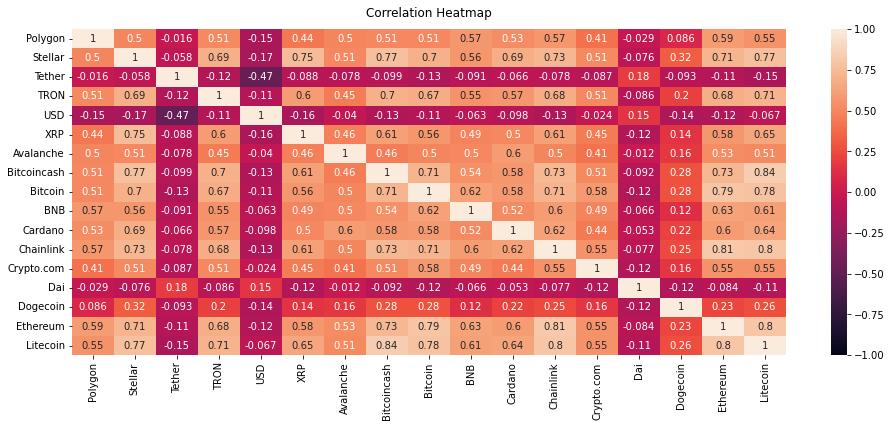

In [478]:

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(method='pearson'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [479]:
Bitcoincash = df2.filter(['Bitcoincash'])

In [480]:
Litecoin =df2.filter(['Litecoin'])

In [481]:
Bitcoincash.head()

,Bitcoincash
0,1.68
1,-0.24
2,-3.40
3,3.67
4,-7.30


In [482]:
Litecoin.head()

,Litecoin
0,0.74
1,-1.46
2,-2.49
3,3.69
4,-5.58


In [483]:
y = Bitcoincash['Bitcoincash']

In [484]:
x_train, x_test, y_train, y_test = train_test_split(Litecoin, y, test_size=0.25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(274, 1) (274,)
(92, 1) (92,)


In [485]:
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(x_train, y_train)
lrm_predictions = lrm.predict(x_test)

In [486]:
lrm_predictions[0:10]

array([ 1.69089968, -4.54387951,  1.01074195, -2.75628548, -0.33213357,
       -0.99485136, -1.98020807, -3.32308359, -0.8640518 , -1.23901054])

Text(0, 0.5, 'Predicted')

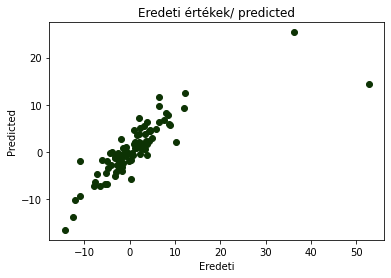

In [487]:
plt.scatter(y_test,lrm_predictions,  color="#0d3304")
plt.title("Eredeti értékek/ predicted")
plt.xlabel('Eredeti')
plt.ylabel('Predicted')

In [488]:
print('Succesrate:', lrm_model.score(x_test,y_test) )

Succesrate: 0.6690659256911871


In [489]:
print(lrm_predictions)

[ 1.69089968e+00 -4.54387951e+00  1.01074195e+00 -2.75628548e+00
 -3.32133571e-01 -9.94851359e-01 -1.98020807e+00 -3.32308359e+00
 -8.64051795e-01 -1.23901054e+00 -1.74476886e+00  5.43176719e+00
  3.68777301e+00  1.06306177e+00  2.03097854e+00 -6.34019351e+00
 -1.88428839e+00  9.14822266e-01  6.26888439e+00 -1.49014182e-01
  8.45062499e-01  9.23367450e+00 -7.41972203e-01 -2.79116536e+00
  1.72577956e+00  4.41153059e+00 -2.71268562e+00 -5.12811756e+00
  7.24552113e+00 -1.64884918e+00  2.14433816e+00 -2.03252789e+00
  8.30935758e+00  1.43610174e+01  5.64104649e+00  1.56882008e+00
 -1.13437089e+00 -1.15181083e+00 -3.18356405e+00  2.26641775e+00
  2.17224595e-01 -6.74131218e+00 -4.09044102e+00  1.80425930e+00
 -2.25052717e+00 -4.54213163e-01 -7.24532261e-01  9.68711298e+00
  4.55977010e+00 -7.15812290e-01 -6.88083171e+00  6.76592273e+00
 -1.65774393e+01 -7.22963055e+00  1.15619067e+01  2.11817825e+00
 -7.24532261e-01 -1.81452862e+00 -2.31156696e+00 -1.39265682e+01
  3.63545318e+00  5.14400

In [492]:
Coinpredicted = pd.DataFrame(x_test)
Coinpredicted['Original_values'] = y_test
Coinpredicted['Predicted_Litecoin'] = lrm_predictions

In [493]:
Coinpredicted.head(10)
##Coinpredicted.drop("Predicted_values",axis=1)

,Litecoin,Original_values,Predicted_Litecoin
359,2.05,3.76,1.690900
191,-5.10,-5.28,-4.543880
57,1.27,-0.82,1.010742
120,-3.05,-2.75,-2.756285
196,-0.27,0.46,-0.332134
101,-1.03,-1.91,-0.994851
102,-2.16,-0.19,-1.980208
106,-3.70,-2.28,-3.323084
10,-0.88,-0.72,-0.864052
272,-1.31,-3.31,-1.239011


In [494]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lrm_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrm_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrm_predictions)))

Mean Absolute Error: 2.3204558175562373
Mean Squared Error: 23.278249125968653
Root Mean Squared Error: 4.824753789155324


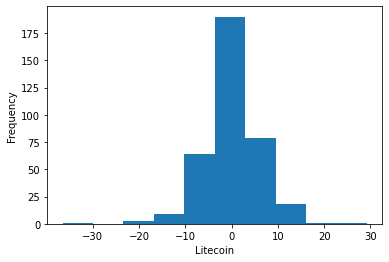

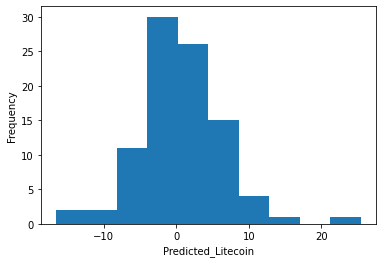

In [495]:
Litecoin['Litecoin'].plot.hist()
plt.xlabel("Litecoin")
plt.show()
Coinpredicted['Predicted_Litecoin'].plot.hist()
plt.xlabel("Predicted_Litecoin")
plt.show()

In [501]:
alldate

,Date
0,"Jan 26, 2022"
1,"Jan 25, 2022"
2,"Jan 24, 2022"
3,"Jan 23, 2022"
4,"Jan 22, 2022"
...,...
361,"Jan 30, 2021"
362,"Jan 29, 2021"
363,"Jan 28, 2021"
364,"Jan 27, 2021"


In [502]:
path='C:\\Users\\hvill\\Destop\\'

In [503]:
##alldate.to_csv('dates.csv')

Magyar-angol konverziót excelben csináltam

In [506]:
converteddates = pd.read_csv("dates.csv", sep=';', header=0)

In [507]:
converteddates.head()

,Date
0,2022-01-26
1,2022-01-25
2,2022-01-24
3,2022-01-23
4,2022-01-22


In [509]:
converteddates.sort_values('Date')

,Date
365,2021-01-26
364,2021-01-27
363,2021-01-28
362,2021-01-29
361,2021-01-30
...,...
4,2022-01-22
3,2022-01-23
2,2022-01-24
1,2022-01-25


In [510]:
converteddates=converteddates.dropna(axis=1)

In [511]:
converteddates

,Date
0,2022-01-26
1,2022-01-25
2,2022-01-24
3,2022-01-23
4,2022-01-22
...,...
361,2021-01-30
362,2021-01-29
363,2021-01-28
364,2021-01-27


In [512]:
Linedf = pd.DataFrame(converteddates)
Linedf['Litecoin'] = Litecoin
Linedf['Bitcoincash'] = Bitcoincash

In [513]:
Linedf

,Date,Litecoin,Bitcoincash
0,2022-01-26,0.74,1.68
1,2022-01-25,-1.46,-0.24
2,2022-01-24,-2.49,-3.40
3,2022-01-23,3.69,3.67
4,2022-01-22,-5.58,-7.30
...,...,...,...
361,2021-01-30,-0.98,2.38
362,2021-01-29,1.09,0.67
363,2021-01-28,8.80,7.06
364,2021-01-27,-9.11,-11.68


In [514]:
sortedLinedf=Linedf.sort_values('Date')

In [515]:
sortedLinedf

,Date,Litecoin,Bitcoincash
365,2021-01-26,-1.75,-1.07
364,2021-01-27,-9.11,-11.68
363,2021-01-28,8.80,7.06
362,2021-01-29,1.09,0.67
361,2021-01-30,-0.98,2.38
...,...,...,...
4,2022-01-22,-5.58,-7.30
3,2022-01-23,3.69,3.67
2,2022-01-24,-2.49,-3.40
1,2022-01-25,-1.46,-0.24


In [516]:
sortedLinedf.dtypes

Date            object
Litecoin       float64
Bitcoincash    float64
dtype: object

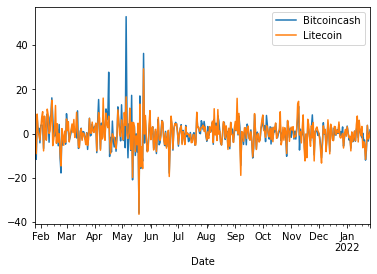

In [517]:
sortedLinedf["Date"] = pd.to_datetime(sortedLinedf['Date'])
sortedLinedf.plot(x="Date", y=["Bitcoincash", "Litecoin"])
plt.show()

In [519]:
allCryptoLines_sorted


,Date,Litecoin,Bitcoincash,Polygon,Stellar,Tether,TRON,USD,XRP,Avalanche,Bitcoincash,Bitcoin,BNB,Cardano,Chainlink,Crypto.com,Dai,Dogecoin,Ethereum,Litecoin
365,2021-01-26,-1.75,-1.07,31.76,0.33,0.12,-0.01,-0.08,0.31,0.54,-1.07,0.77,-0.10,0.13,-1.16,-0.95,0.06,-1.35,3.67,-1.75
364,2021-01-27,-9.11,-11.68,-3.02,-8.99,0.07,-4.11,-0.08,-6.59,-8.56,-11.68,-6.46,-1.80,-9.19,-9.23,-7.85,-0.06,-9.70,-8.68,-9.11
363,2021-01-28,8.80,7.06,-7.84,22.79,-0.06,4.54,-0.07,5.35,6.92,7.06,9.77,3.63,10.19,9.58,7.70,-0.22,387.36,6.48,8.80
362,2021-01-29,1.09,0.67,4.02,0.25,-0.07,12.82,0.19,7.05,-2.71,0.67,2.78,0.93,1.12,-1.09,-2.15,0.06,28.49,3.83,1.09
361,2021-01-30,-0.98,2.38,0.00,11.97,0.08,-3.54,-0.07,56.67,3.39,2.38,-0.05,4.40,4.61,3.91,-3.75,-0.28,-39.49,-0.17,-0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-01-22,-5.58,-7.30,-9.86,-5.26,0.00,-7.04,0.01,-6.37,-9.56,-7.30,-3.84,-6.71,-4.41,-8.91,-7.23,0.04,-6.24,-6.17,-5.58
3,2022-01-23,3.69,3.67,5.14,4.53,0.02,1.27,-0.01,5.36,8.23,3.67,3.40,7.14,4.98,4.85,12.12,-0.15,6.36,5.32,3.69
2,2022-01-24,-2.49,-3.40,-6.64,-1.56,-0.01,-4.28,-0.03,-2.65,-2.78,-3.40,1.15,-3.26,-5.18,-6.43,-1.02,-0.03,-3.10,-3.93,-2.49
1,2022-01-25,-1.46,-0.24,3.32,-0.67,0.02,1.48,-0.03,0.90,7.92,-0.24,0.72,3.58,-2.25,-0.44,4.62,0.07,3.86,0.70,-1.46


In [520]:
converteddates2=converteddates.drop(["Litecoin","Bitcoincash"], axis=1)

In [521]:
converteddates2.to_csv('dates.csv')

In [522]:
allCryptoLines = pd.concat([converteddates2, df2], join = 'outer', axis = 1)

In [523]:
allCryptoLines_sorted=allCryptoLines.sort_values("Date")

In [532]:
querydf=allCryptoLines_sorted[(allCryptoLines_sorted['Date'] >= '2022-01-16') & (allCryptoLines_sorted['Date'] <= '2022-01-26')]

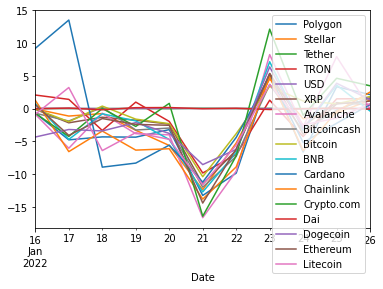

In [533]:
allCryptoLines_sorted["Date"] = pd.to_datetime(allCryptoLines_sorted['Date'])
querydf.plot(x="Date", y=['Polygon',
 'Stellar',
 'Tether',
 'TRON',
 'USD',
 'XRP',
 'Avalanche',
 'Bitcoincash',
 'Bitcoin',
 'BNB',
 'Cardano',
 'Chainlink',
 'Crypto.com',
 'Dai',
 'Dogecoin',
 'Ethereum',
 'Litecoin'])
plt.show()

In [ ]:
querydf=allCryptoLines_sorted[(allCryptoLines_sorted['Date'] >= '2022-01-16') & (allCryptoLines_sorted['Date'] <= '2022-01-26')]

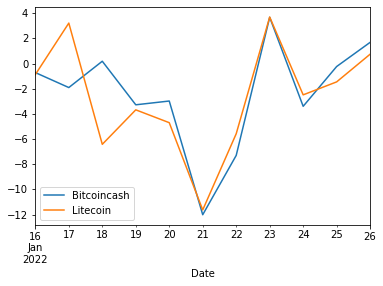

In [538]:
querydf.filter(['Date','Litecoin','Bitcoincash']).plot(x="Date", y=['Bitcoincash',
 'Litecoin'])
plt.show()

In [549]:
# Data comes from:
# https://finance.yahoo.com/quote/BTC-USD/history?period1=1279314000&period2=1556053200&interval=1d&filter=history&frequency=1d

csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
# csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/AAPL.csv"

In [550]:
df = pd.read_csv(csv_path, parse_dates=['Date'])

In [551]:
df = df.sort_values('Date')

In [552]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [553]:
df.shape

(3201, 7)

Text(0, 0.5, 'Close Price (USD)')

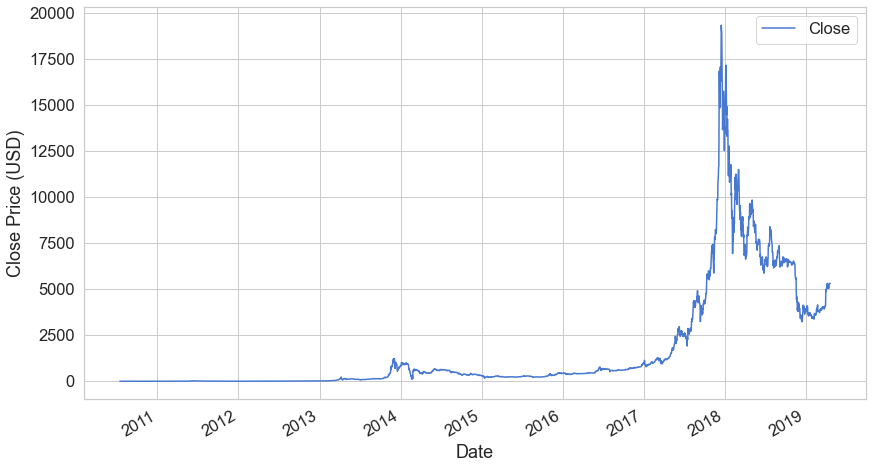

In [554]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

In [555]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [563]:
scaled_close.shape

(3201, 1)

In [564]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [565]:
scaled_close = scaled_close.reshape(-1, 1)

In [566]:
np.isnan(scaled_close).any()

False

In [569]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.90)

In [580]:
X_train.shape

(2790, 99, 1)

In [581]:
X_test.shape

(311, 99, 1)

In [582]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [583]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [584]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNNV2' used by {{node sequential_2/bidirectional_3/forward_cu_dnnlstm_3/CudnnRNNV2}} with these attrs: [dropout=0, seed=0, input_mode="linear_input", T=DT_FLOAT, direction="unidirectional", rnn_mode="lstm", seed2=0, is_training=true]
Registered devices: [CPU]
Registered kernels:
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
  device='GPU'; T in [DT_DOUBLE]

	 [[sequential_2/bidirectional_3/forward_cu_dnnlstm_3/CudnnRNNV2]] [Op:__inference_train_function_11897]